# Problem Statement: Airbnb Hotel Booking Analysis.
The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and tourism. Leading this revolution is Airbnb, Inc., a pioneering American company that has reshaped travel accommodation through its innovative online marketplace. Established in 2008 in San Francisco, California, Airbnb provides a diverse range of lodging options, offering guests a unique and personalized experience. Unlike traditional hospitality providers, Airbnb operates on a commission-based model, facilitating transactions between hosts and guests without owning the properties listed on its platform.

This research analysis delves into the New York City Airbnb dataset to extract meaningful insights. Through rigorous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city's lodging market. By discerning factors influencing listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb's operations in one of the world's most dynamic urban environments. These insights hold significance for stakeholders and enthusiasts seeking to navigate the evolving landscape of short-term accommodation.








In [5]:
#importing the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
#Importing the Dataset
df=pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv',low_memory= False)

# Accessing the data

In [7]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,8.001449e+10,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,5.233517e+10,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,7.882924e+10,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,8.509833e+10,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,9.203760e+10,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31611 entries, 0 to 31610
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              31611 non-null  int64  
 1   NAME                            31497 non-null  object 
 2   host id                         31610 non-null  float64
 3   host_identity_verified          31452 non-null  object 
 4   host name                       31386 non-null  object 
 5   neighbourhood group             31583 non-null  object 
 6   neighbourhood                   31594 non-null  object 
 7   lat                             31602 non-null  float64
 8   long                            31602 non-null  float64
 9   country                         31523 non-null  object 
 10  country code                    31531 non-null  object 
 11  instant_bookable                31531 non-null  object 
 12  cancellation_policy             

In [9]:
df.duplicated().value_counts()

,count
False,31611


In [10]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",2.680241e+10,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


# Problems Identified within the Data


*   541 duplicated records were found in the data.

*   Insufficient information was recorded for the house_rules and licence columns.

*   Dollar signs and commas were recorded along with the values for price and service fee.

*   The currency for price and service fee was not added to the column's titles.

*   Missing values in some records.

*   Columns like the price, service fee, id, host id, last review, construction year are assigned wrong datatypes.

*   In the neighbourhood group column the spelling of 'Brooklyn' was misspelt in some records.

*   Some outliers were identified in the availability 365 column.





CLEAN THE DATA

Steps to be Taken for Data Cleaning

*  Drop duplicated records.

*  Drop house_rules and license columns with insufficient data.

*  Remove all dollar signs in the price and service fee columns.

*  Remove all commas from the price and service fee columns.

*  Rename the price and service fee columns to include a dollar signs.

*  Drop all records with missing values.

*  Change all mismatched data types to the appropriate once.

*  Correct the Spelling of 'brookln' to 'Brooklyn'

*  Get rid of outliers in the 'availability 365' column data.

In [11]:
#drop duplicate values
df.drop_duplicates(inplace=True)

In [12]:
#drop house_rules,license columns
df.drop(['house_rules','license'], axis = 1, inplace = True)

In [13]:
# remove dollar sign and service fee column
df['price']=df['price'].str.replace('$','' ,regex= False)
df['service fee']=df['service fee'].str.replace('$','' ,regex= False)

In [14]:
# remove commas in price and service fee column
df['price']=df['price'].str.replace(',','' ,regex= False)
df['service fee']=df['service fee'].str.replace(',','' ,regex= False)

In [15]:
df.rename(columns={
    'price':'price_$',
    'service fee':'service_fee_$'
},inplace=True)


In [16]:
#drpo all null values
df.dropna(inplace=True)

In [17]:
#correct the mismatched datatypes
df['price_$'] = df['price_$'].astype(str).str.replace('$', '', regex=False).str.strip()
df['service_fee_$'] = df['service_fee_$'].astype(str).str.replace('$', '', regex=False).str.strip()
df['price_$']=df['price_$'].astype(float)
df['service_fee_$']=df['service_fee_$'].astype(float)
df['id']=df['id'].astype(str)
df['host id']=df['host id'].astype(str)
df['last review']=pd.to_datetime(df['last review'])
df['Construction year']=df['Construction year'].astype(int)

In [18]:
df.loc[df['neighbourhood group'] == 'brookln','neighbourhood group' ] = 'Brooklyn'


In [19]:
#remove the outliers
df=df.drop(df[df['availability 365'] >500].index)

In [20]:
df.duplicated().value_counts()

,count
False,25265


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25265 entries, 0 to 31609
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              25265 non-null  object        
 1   NAME                            25265 non-null  object        
 2   host id                         25265 non-null  object        
 3   host_identity_verified          25265 non-null  object        
 4   host name                       25265 non-null  object        
 5   neighbourhood group             25265 non-null  object        
 6   neighbourhood                   25265 non-null  object        
 7   lat                             25265 non-null  float64       
 8   long                            25265 non-null  float64       
 9   country                         25265 non-null  object        
 10  country code                    25265 non-null  object        
 11  instant

# EXPLORATORY DATA ANALYSIS (EDA)

Exploratory Data Analysis (EDA) is a vital phase in data analysis, involving the examination and visualization of data to uncover patterns, trends, and insights. In the context of an Airbnb data analysis project, EDA allows researchers to gain a comprehensive understanding of the dataset's characteristics, distribution, and relationships between variables. Through techniques such as summary statistics, data visualization, and correlation analysis, EDA sets the stage for further investigation and hypothesis testing, guiding subsequent analytical decisions.

In [22]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,25265.000000,25265.000000,25265.000000,25265.000000,25265.000000,25265.000000,25265.000000,25265,25265.000000,25265.000000,25265.000000,25265.000000
mean,40.728436,-73.953194,2012.472670,623.273818,124.657550,6.612745,36.849713,2018-06-23 09:11:02.149218304,1.057089,3.111142,3.213062,155.830437
min,40.508680,-74.239860,2003.000000,50.000000,10.000000,-12.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.688300,-73.982110,2007.000000,335.000000,67.000000,2.000000,4.000000,2017-09-25 00:00:00,0.120000,2.000000,1.000000,16.000000
50%,40.721680,-73.955690,2012.000000,620.000000,124.000000,3.000000,13.000000,2019-01-19 00:00:00,0.420000,3.000000,1.000000,134.000000
75%,40.763660,-73.938250,2017.000000,912.000000,182.000000,5.000000,49.000000,2019-06-19 00:00:00,1.500000,4.000000,2.000000,278.000000
max,40.908040,-73.712990,2022.000000,1200.000000,240.000000,1250.000000,629.000000,2022-05-21 00:00:00,19.750000,5.000000,232.000000,426.000000
std,0.054470,0.042961,5.762523,333.326902,66.669479,20.619096,54.385632,NaN,1.423885,1.375017,10.390522,136.124396


In [23]:
#Different property types in the Dataset
property_types=df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,13608
Private room,11238
Shared room,419


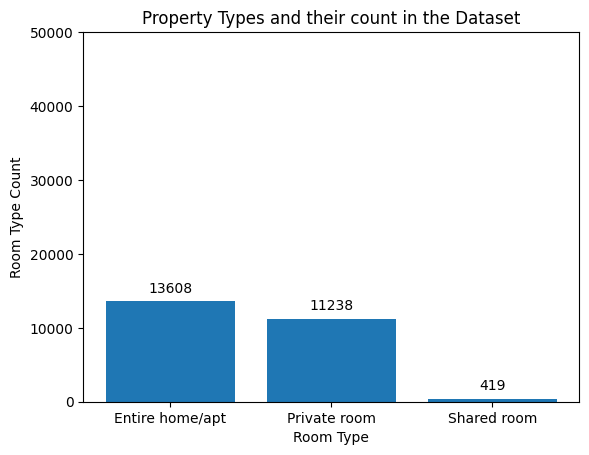

In [24]:
#Room type count ploted in a bar chart
room_type_bar=plt.bar( property_types.index,property_types.loc[:,"count"])
plt.bar_label(room_type_bar,labels=property_types.loc[:,"count"],padding=4);
plt.ylim([0,50000])
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their count in the Dataset');

The Airbnb open dataset reveals four distinct property or room types. These categories comprise:

*  Entire home/apt

*  Private room

*  Shared room

*  Hotel room

Notably, the barchart illustrates that Entire home/apt dominates the dataset with 44,163 occurrences, followed by Private room with 37,494 occurrences. Shared room and Hotel room trail behind with 1,646 and 108 occurrences, respectively.

Neighbourhood group having the highest number of listings

In [25]:
hood_group=df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,11058
Manhattan,10946
Queens,2615
Bronx,477
Staten Island,169


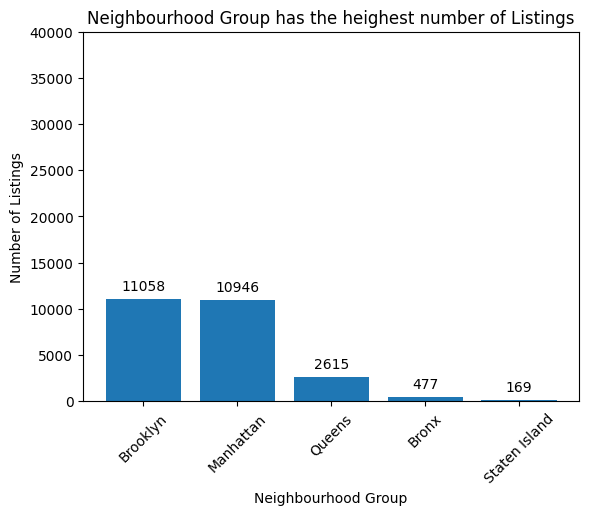

In [26]:
hood_group_bar=plt.bar( hood_group.index,hood_group.loc[:,"count"])
plt.bar_label(hood_group_bar,labels=hood_group.loc[:,"count"],padding=4);
plt.ylim([0,40000])
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.title('Neighbourhood Group has the heighest number of Listings');

The dataset contains five different neighborhood groups, namely Brooklyn, Manhattan, Queens, Bronx, and Staten Island. According to the barchart, Brooklyn has the highest number of listings with 34,636, followed closely by Manhattan with 34,566.

Neighbouhood group having the highest average prices for Airbnb listings

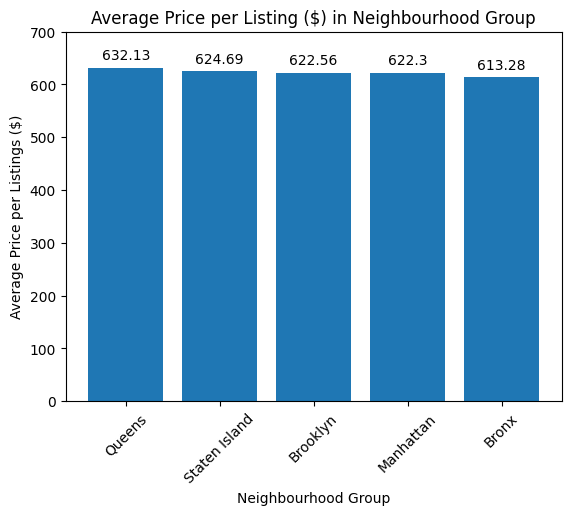

In [27]:
avg_price=df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar=plt.bar(avg_price.index,avg_price.loc[:,"price_$"])
plt.bar_label(avg_price_bar,labels=round(avg_price.loc[:,"price_$"],2),label_type='edge',padding=4);
plt.ylim([0,700])
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price per Listings ($)');
plt.xticks(rotation=45)
plt.title('Average Price per Listing ($) in Neighbourhood Group');


Among the five identified neighborhood groups in the dataset, Queens boasts the highest average listing price at 630.46 USD, closely trailed by the Bronx with an average listing price of 630.20 USD. Conversely, Staten Island records the lowest average listing price at 622.13 USD.

Relationship between the construction year of property and the price

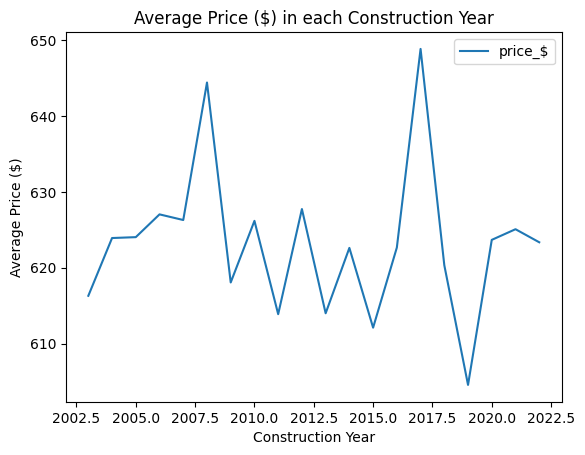

In [28]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) in each Construction Year');

The line plot depicting the construction year of properties versus the average price per property reveals a noticeable downward trend in prices as the construction years progress. The pattern demonstrates decreasing lows and highs, suggesting an overall decline in property prices as time advances.

Top 10 hosts by calculated host listing count

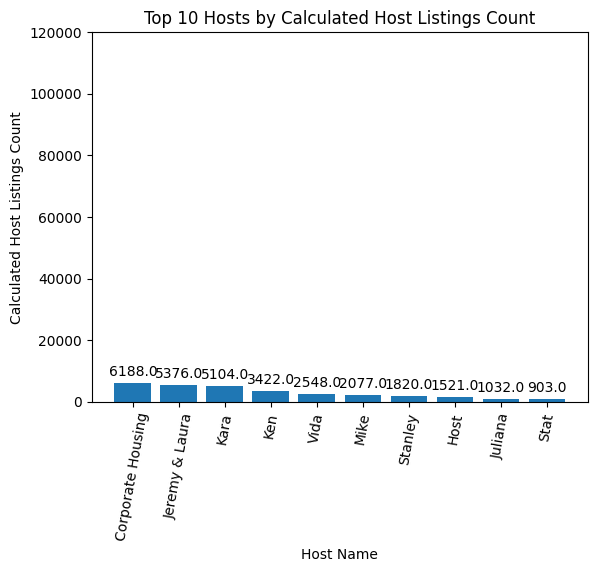

In [29]:
hosts=df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar=plt.bar(hosts.index,hosts.loc[:,"calculated host listings count"])
plt.bar_label(hosts_bar,labels=hosts.loc[:,"calculated host listings count"],label_type='edge',padding=3);
plt.xlabel('Host Name')
plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation=80)
plt.ylim([0,120000])
plt.title('Top 10 Hosts by Calculated Host Listings Count');

The bar chart above illustrates the top 10 hosts based on the calculated listing count, with Sonder (NYC) notably leading with 111,921 listings. Subsequently, the other hosts follow in descending order.
*  Karen at second position with 42,410 hosts

*  Jeniffer at third position with 31,447 hosts

*  Blueground at fourth position with 21,168 hosts

*  Kaz at fifth position with 17,552 hosts

*  Corporate Housing at sixth position with 14,833 hosts

*  Soya at seventh position with 10,260 hosts

*  Stay with vibe at eighth position with 10,260 hosts

*  Kara at ninth position with 10,092 hosts

*  And finally Jeremy and Laura at tenth position with 10,080 hosts

In [30]:
review=df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.118883
unconfirmed,3.103481


Text(0.5, 1.0, 'Average Review Rate per Host Verification Status')

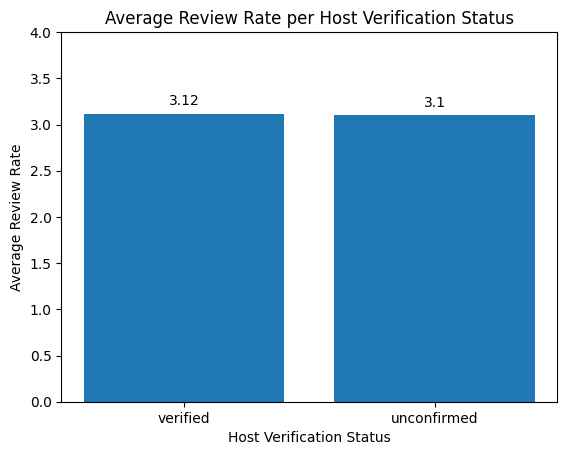

In [31]:
review_bar=plt.bar(review.index,review.loc[:,'review rate number'])
plt.bar_label(review_bar,labels=round(review.loc[:,'review rate number'],2),padding=4);
plt.ylim([0,4])
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate per Host Verification Status')

Text(0.5, 1.0, 'Average Review Rate per Host Verification Status')

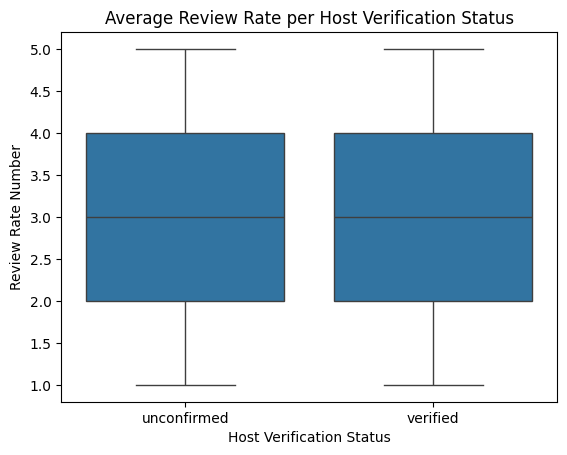

In [32]:
base_color=sns.color_palette()[0]
sns.boxplot(data=df,x='host_identity_verified',y='review rate number',color=base_color)
plt.xlabel('Host Verification Status')
plt.ylabel('Review Rate Number')
plt.title('Average Review Rate per Host Verification Status')

The average review rates for verified and unconfirmed hosts are 3.27 and 3.28, respectively, indicating a marginal difference in their review rates, with unconfirmed hosts having a slightly higher rate. This suggests that verified hosts are not necessarily more likely to receive positive reviews compared to unconfirmed hosts.

Correlation between the price of listing and the service fee

In [33]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999910293305889)

Text(0.5, 1.0, 'A regression plot showing the correlation between the price of a Listing and Service Fee')

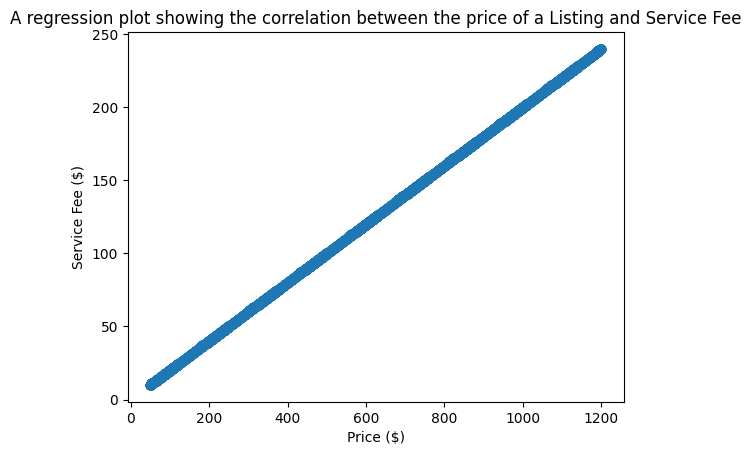

In [34]:
sns.regplot(df,x='price_$',y='service_fee_$')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('A regression plot showing the correlation between the price of a Listing and Service Fee')


The Pearson correlation coefficient between the price and service fee is 0.99, indicating a highly robust positive correlation between these variables. On the regression plot, each point forms a rising diagonal line towards the right, signifying that as the price of a property increases, so does its service fee.

Average review rate for listings, and does it based on the neighbourhood group and room type

In [35]:
ARRN=df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.253086
                    Private room               3.139535
                    Shared room                2.785714
Brooklyn            Entire home/apt            3.068887
                    Private room               3.138958
                    Shared room                3.093333
Manhattan           Entire home/apt            3.092431
                    Private room               3.129118
                    Shared room                3.145161
Queens              Entire home/apt            3.128530
                    Private room               3.142105
                    Shared room                3.323529
Staten Island       Entire home/apt            3.134146
                    Private room               3.488372
                    Shared room                5.000000

Text(0.5, 1.0, 'Average Review Rate per Neighbourhood Group and Room Type')

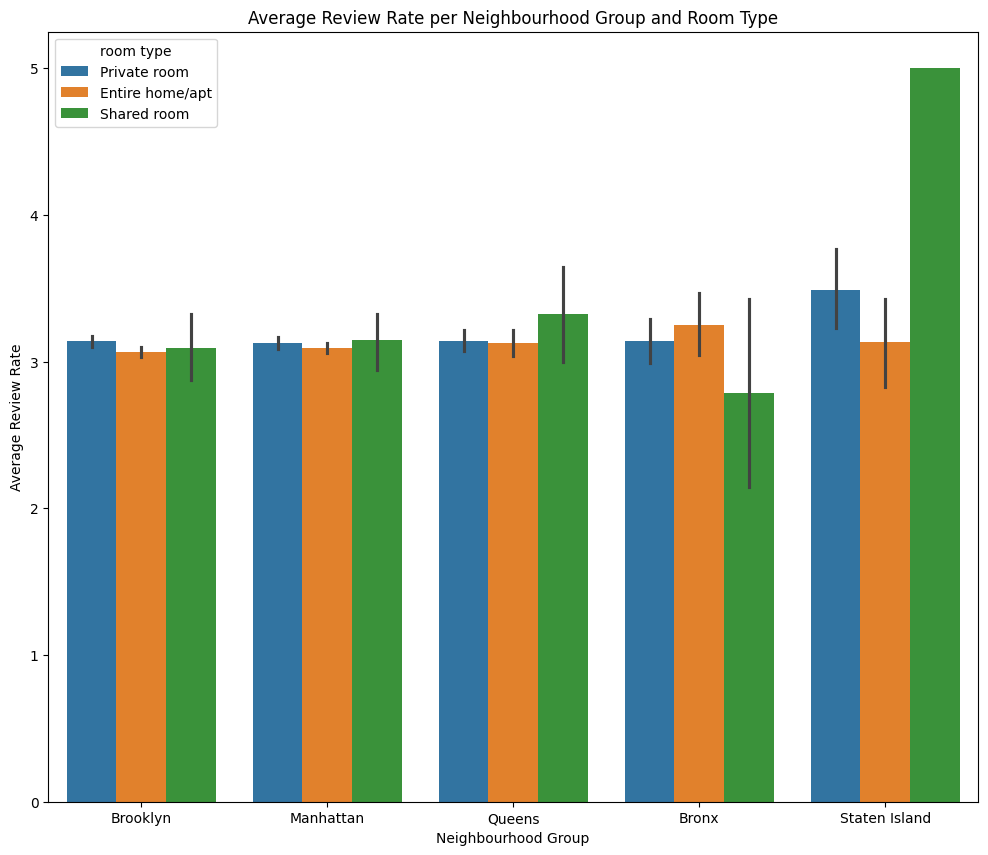

In [36]:
plt.figure(figsize=[12,10])
sns.barplot(data=df,x='neighbourhood group',y='review rate number',hue='room type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate per Neighbourhood Group and Room Type')


Hotel rooms exhibit has higher review rate compared to all other property types within the three neighborhood groups where they are located: Brooklyn, Manhattan, and Queens.

Text(0.5, 1.0, 'A regression plot showing the correlation between the Calculated Host Listings Count and Availability 365')

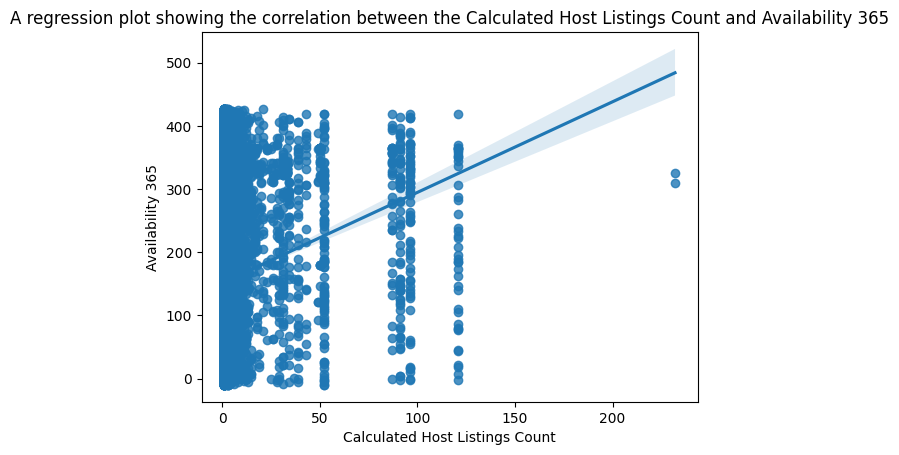

In [37]:
sns.regplot(data=df,x='calculated host listings count',y='availability 365')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability 365')
plt.title('A regression plot showing the correlation between the Calculated Host Listings Count and Availability 365')

In [38]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.10948436684853582)

The Pearson correlation coefficient for the association between calculated host listings and availability 365 is 0.136, indicating a weak positive correlation between the two variables.

# Conclusion
In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we've uncovered valuable insights into listing distribution, pricing dynamics, host, and review analysis.

Key findings include the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups, and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on review rates, as well as the strong correlation between listing price and service fee.

Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbnb. Lastly, expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short-term lodging industry.






